# Model training

#### BTC-USDT for ROR_n10

<br>

#### Model ID | Model Execution ID pairs

```
model_id: 1a198235336cc9cd417004b752cc80ffdf7b2705
    - n_estimators = 500
    - max_depth = 25

```



#### Resources
+ [BigQuery](https://console.cloud.google.com/bigquery?folder=&organizationId=&project=algomosaic-nyc)
+ [Storage](https://console.cloud.google.com/storage/browser/algom-trading/models/?project=algomosaic-nyc)



<br> 

#### Requirements


In [2]:
import numpy as np
from algom import configs
from algom.utils.data_object import dataObject
from algom.model_regression import modelRegression
from algom.model_plots import modelPlots

<br>

### Load training data


In [12]:
# Load model data
data = dataObject("""
SELECT * EXCEPT (
  conversionType,
  conversionSymbol,
  partition_date,
  ATR_, RSI_)
FROM `algom-trading.train_features.features_BTC_USDT_hour_i02_20200101`
WHERE 
    year = 2020
    AND close IS NOT NULL
""")

RUNNING: Querying SQL script.


Downloading: 100%|██████████| 8784/8784 [00:10<00:00, 830.19rows/s]

SUCCESS: Loaded SQL query.


In [13]:
# Drop nan values
data.df = data.df.replace([np.inf, -np.inf], np.nan).dropna()
print(len(data.df))
data.df.head()

8563


,ticker_time_sec,close,high,low,open,volume_base,volume,etl_time,ticker_time,ticker,...,MACDsign_9_12,MACDdiff_9_12,MACD_26_200,MACDsign_26_200,MACDdiff_26_200,MACD_20_200,MACDsign_20_200,MACDdiff_20_200,Mass_Index_9_25,SO_pct_k
0,1577836800,7177.02,7196.25,7175.46,7195.23,480.93,3453949.34,2021-01-05 00:01:56.919700+00:00,2020-01-01 00:00:00+00:00,BTC-USDT,...,7191.489438,-7196.469863,-43.005903,7191.489438,-7234.495341,-53.263989,7191.489438,-7244.753427,24.424669,0.075036
1,1577840400,7216.27,7230.00,7175.71,7177.02,836.51,6030300.92,2021-01-05 00:01:56.919700+00:00,2020-01-01 01:00:00+00:00,BTC-USDT,...,7196.445550,-7199.516038,-42.873158,7196.445550,-7239.318708,-52.251705,7196.445550,-7248.697256,24.374815,0.747099
2,1577844000,7242.85,7244.87,7211.41,7216.27,626.60,4530216.13,2021-01-05 00:01:56.919700+00:00,2020-01-01 02:00:00+00:00,BTC-USDT,...,7205.726440,-7206.182801,-41.015458,7205.726440,-7246.741899,-49.028477,7205.726440,-7254.754918,24.403118,0.939629
3,1577847600,7225.01,7245.00,7220.00,7242.85,748.76,5414508.65,2021-01-05 00:01:56.919700+00:00,2020-01-01 03:00:00+00:00,BTC-USDT,...,7209.583152,-7209.079293,-40.426219,7209.583152,-7250.009371,-47.616314,7209.583152,-7257.199466,24.367324,0.200400
4,1577851200,7217.27,7230.00,7215.03,7225.01,442.09,3193315.81,2021-01-05 00:01:56.919700+00:00,2020-01-01 04:00:00+00:00,BTC-USDT,...,7211.120522,-7210.339402,-40.352577,7211.120522,-7251.473099,-46.966359,7211.120522,-7258.086881,24.292316,0.149633


<br>

### Initialize modelRegression class

In [14]:
# Initialize model class
model = modelRegression(
    data, 
    outcome='ROR_n24',
    model_id='7959fdd354a37ab43d2786edc7a6b041edb9c5f5',
    index_features=configs.INDEX_FEATURES, 
    omit_features=configs.OMIT_FEATURES
)

SUCCESS: Loaded dataObject.
SUCCESS: Model 7959fdd354a37ab43d2786edc7a6b041edb9c5f5 has been loaded successfully.
Downloaded file from GCS to: /home/jovyan/algomosaic/data/models/20210105_GradientBoostingRegressor_7959fdd354a37ab43d2786edc7a6b041edb9c5f5.pickle
Initialized model. As a next step, run self.predict() or self.train().


In [15]:
# Validate model
model.predict()


Model metadata added to `self.metadata.metadata`
Model metadata added to `self.metadata.parameters`
Get model performance.
Set R^2 to `self.rsquared`
The following performance measures have been added:
                - self.mean_abs_error
                - self.mean_abs_outcome
                - self.mean_abs_pct_error
                - self.error_var
            
Performance metrics added to `self.performance`

MODEL PERFORMANCE SUMMARY
        - Mean Absolute Error:	 0.04405
        - Mean Absolute Outcome:	 0.02292
        - Mean Absolute Percent Error:	 1.92188
        - Error Variance:	 0.00398
        - R-Squared:		 -1.85717
        
PLOT PREDICTIONS: Use the following commandsto view model performance.
              `self.plot_predictions_by_date(start_date, end_date)`
              `self.plot_predictions_histogram(start_date, end_date)`
              `self.plot_errors_by_date(start_date, end_date)`
              `self.plot_errors_histogram(start_date, end_date)`
              

In [16]:
# Model IDs
print('model_id: ' + model.model_id)
print('model_execution_id: ' + model.model_execution_id)


model_id: 7959fdd354a37ab43d2786edc7a6b041edb9c5f5
model_execution_id: 86f889dc81f7b86b3d470535c72c1be3440150cd


<br>

## View performance 

+ Trending predictions vs outcomes
+ Histogram of predictions vs outcomes


In [22]:
start_date='2020-07-01'
end_date='2020-07-15'
%matplotlib inline
model_plot = modelPlots(model)

PLOT: Predictions by Date
        `self.plot_predictions_by_date(start_date, end_date)`


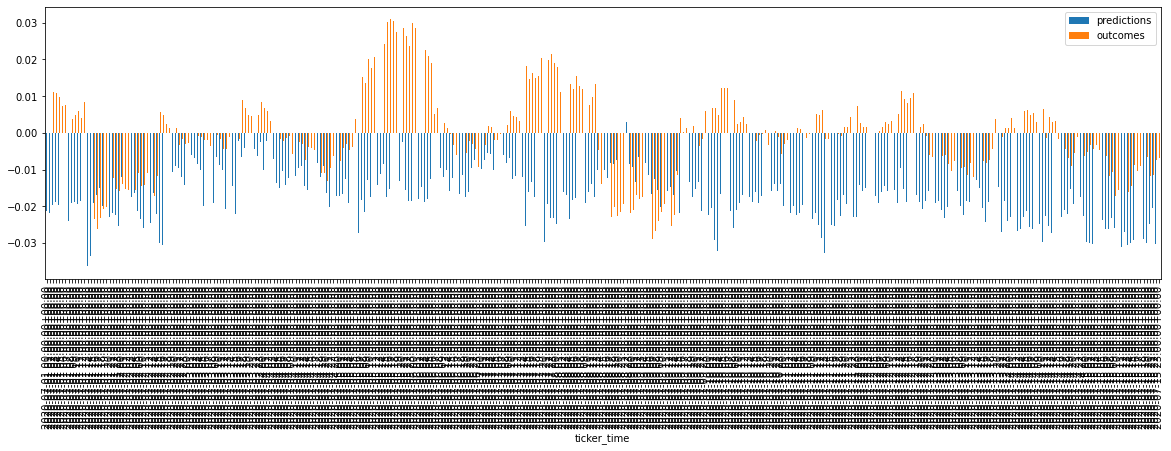

In [23]:
model_plot.plot_predictions_by_date(start_date, end_date)

PLOT: Prediction Errors by Date`


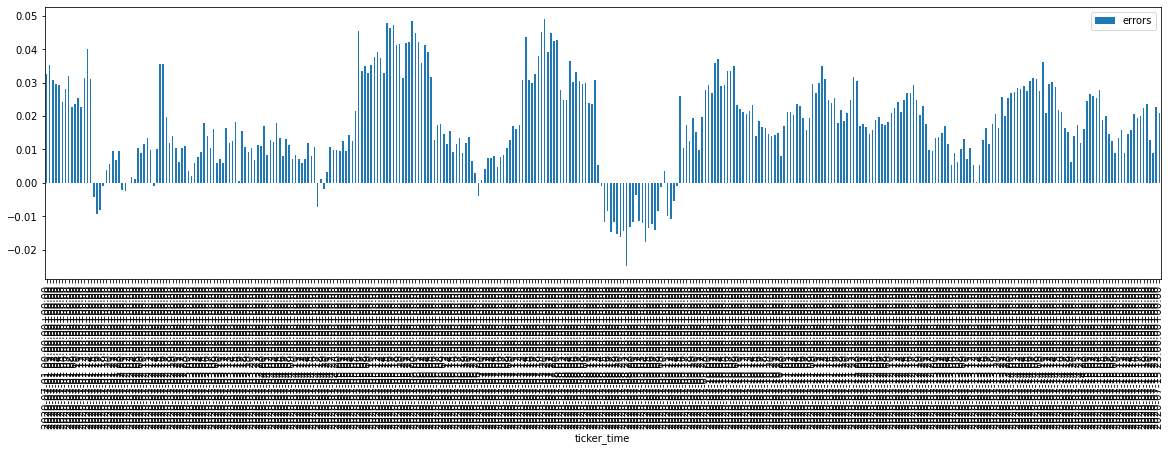

In [24]:
model_plot.plot_errors_by_date(start_date, end_date)

PLOT: Predictions Histogram


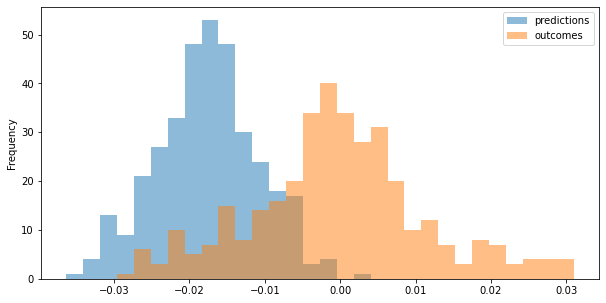

In [25]:
model_plot.plot_predictions_histogram(start_date, end_date)

PLOT: Predictions Histogram


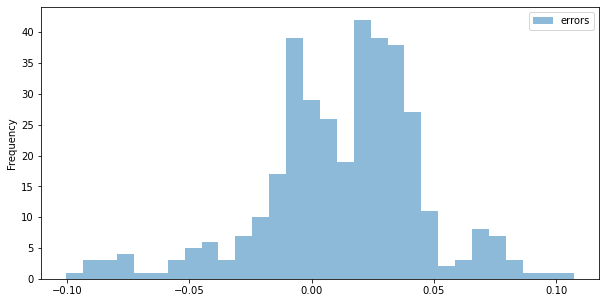

In [21]:
model_plot.plot_errors_histogram(start_date, end_date)


PLOT: Predictions by Date


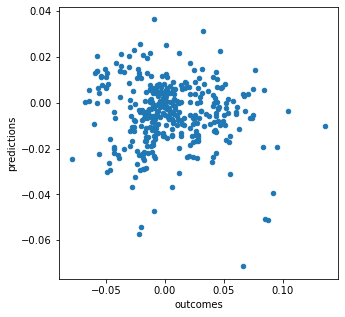

In [12]:
model_plot.plot_predictions_scatterplot(start_date, end_date)

<br>

### View trending features


In [28]:
start_date = '2016-01-01'
end_date = '2017-01-01'
%matplotlib inline 

# from data_mgmt import data_mgmt as dm

model_plot.plot_features(
    df = model.df, 
    x = 'ticker_time', 
    y = 'ROR_n10',
    start_date=start_date, 
    end_date=end_date
)

AttributeError: 'modelPlots' object has no attribute 'plot_features'

In [ ]:
model_plot.plot_features(df = model.df, x = 'ticker_time', y = 'ATR_7',
    start_date=start_date, end_date=end_date, chart_type = 'line')

model_plot.plot_features(df = model.df, x = 'ticker_time', y = 'EMA_20',
    start_date=start_date, end_date=end_date, chart_type='line')
